In [1]:
import spacy
from collections import Counter

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
fichier = open(r"C:\Users\hadrien\Documents\Personnel\formation data\Projet\livre eng\TheHobbit-J.R.R.Tolkien.txt", 'r', encoding='utf-8')


texte = ""
for i, ligne in enumerate(fichier, start=1):
    if i >= 107:
        texte += ligne
    if i == 7932:
        break

# Fermer le fichier après avoir lu les lignes nécessaires
fichier.close()


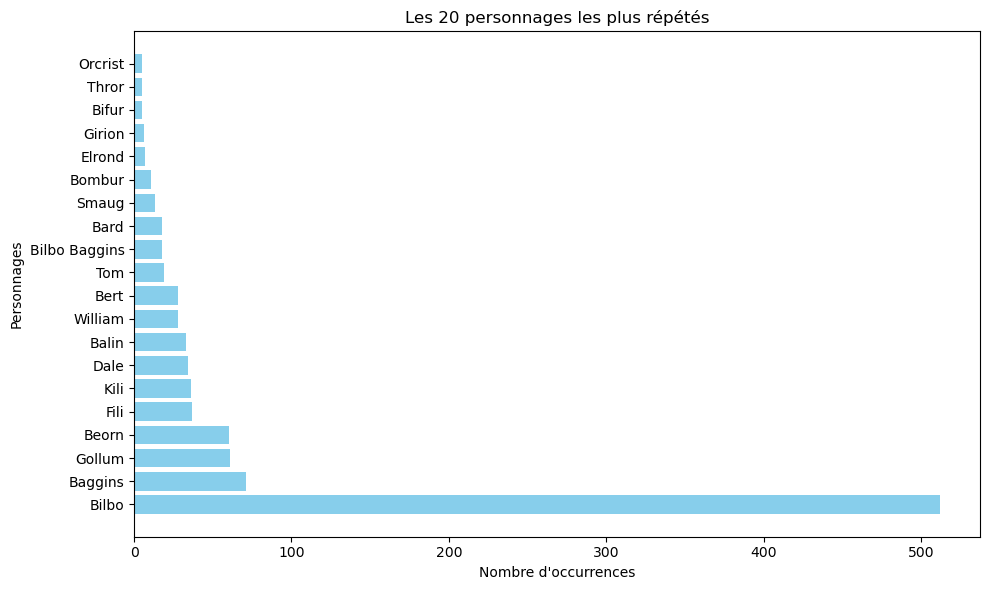

In [3]:

# Charger le modèle SpaCy :
nlp = spacy.load("en_core_web_sm")

# Traiter le texte avec SpaCy
doc = nlp(texte)

# Graphituqe top 20 des noms propres:
noms_propres = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
compteur_noms_propres = Counter(noms_propres)

personnages_plus_repetes = compteur_noms_propres.most_common(20)

noms = [personnage for personnage, _ in personnages_plus_repetes]
occurrences = [occurrence for _, occurrence in personnages_plus_repetes]

plt.figure(figsize=(10, 6))
plt.barh(noms, occurrences, color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Personnages')
plt.title('Les 20 personnages les plus répétés')
plt.tight_layout()

plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadrien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


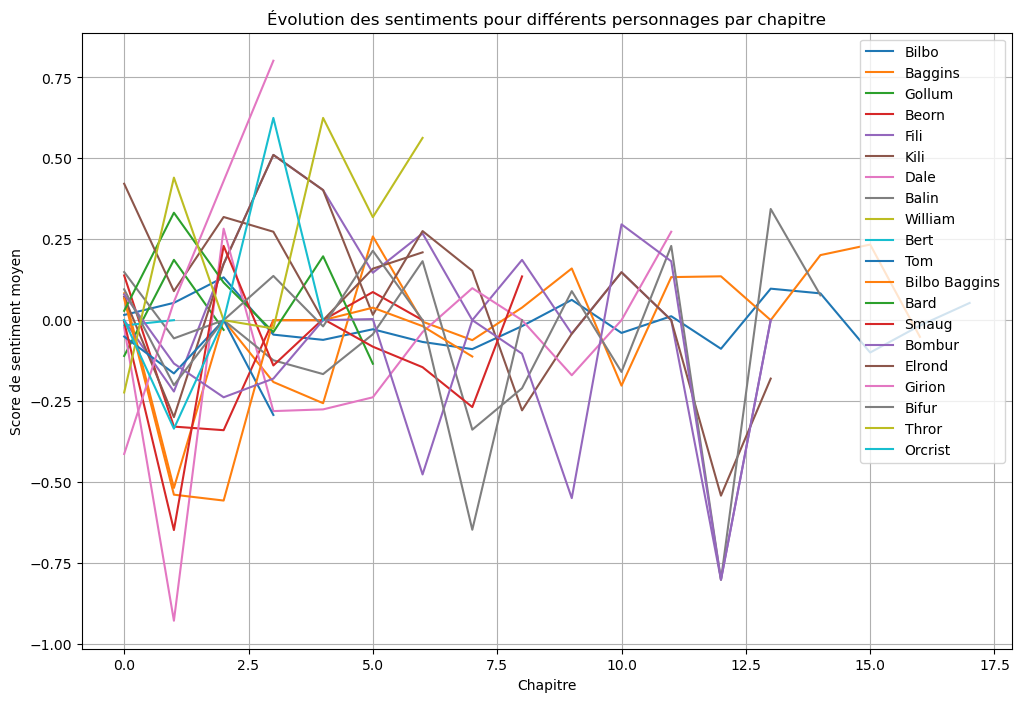

In [4]:

#graphique d'évolution des sentiments des persoannges durant le livre:

def calculate_average_sentiment(character, chapter_text, sia):
    character_occurrences = [sentence for sentence in chapter_text if character in sentence]
    if not character_occurrences:
        return None

    sentiment_scores = [sia.polarity_scores(sentence)["compound"] for sentence in character_occurrences]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    return average_sentiment

def split_text_into_chapters(text, chapter_pattern):
    chapters = []
    current_chapter = []

    for line in text.split('\n'):
        if chapter_pattern in line:
            if current_chapter:
                chapters.append('\n'.join(current_chapter))
            current_chapter = [line]
        else:
            current_chapter.append(line)

    if current_chapter:
        chapters.append('\n'.join(current_chapter))

    return chapters

nltk.download('vader_lexicon')
nltk.download('punkt')

sia = SentimentIntensityAnalyzer()



chapter_pattern = "Chapter"
chapters = split_text_into_chapters(texte, chapter_pattern)

characters = noms

plt.figure(figsize=(12, 8))

for character in characters:
    character_avg_sentiments = []

    for i, chapter in enumerate(chapters, start=1):
        chapter_sentences = chapter.split('\n')
        average_sentiment = calculate_average_sentiment(character, chapter_sentences, sia)

        if average_sentiment is not None:
            character_avg_sentiments.append(average_sentiment)

    plt.plot(character_avg_sentiments, label=character)

plt.title("Évolution des sentiments pour différents personnages par chapitre")
plt.xlabel("Chapitre")
plt.ylabel("Score de sentiment moyen")
plt.grid(True)
plt.legend()
plt.show()
